In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
import torchvision
import numpy as np
import captum.optim as optimviz

In [4]:
from typing import Callable, Dict, List, Optional, Tuple
import numpy as np
import matplotlib.pyplot as plt

LossFunction = Callable[[Dict[torch.nn.Module, Optional[torch.Tensor]]], torch.Tensor]

# Show a nice plot of a tensor
def show(
    x: torch.Tensor, figsize: Optional[Tuple[int, int]] = None, scale: float = 255.0
) -> None:
    assert x.dim() == 3 or x.dim() == 4
    x = x[0] if x.dim() == 4 else x
    x = x.cpu().permute(1, 2, 0) * scale
    if figsize is not None:
        plt.figure(figsize=figsize)
    plt.imshow(x.numpy().astype(np.uint8))
    plt.axis("off")
    plt.show()

Max: tensor([ 22, 440, 112, 285, 184, 345, 269, 182, 498, 245])
Max by magnitude: [433 358 184 285 112 175 440  22 465  33]
Min: tensor(33)


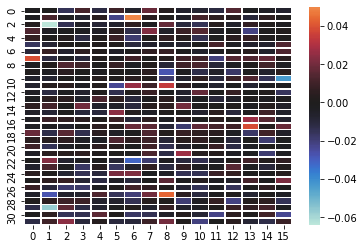

<Figure size 576x432 with 0 Axes>

In [5]:
from expanded_weights import model, get_expanded_weights

# from scipy.spatial import distance
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from PIL import Image
# from torchvision import transforms

# image = Image.open("../../seri/datasets/test_images/trump.png")
# image = image.convert("RGB")

# weightmap1 = get_expanded_weights(model.layer4[0].conv3, model.layer4[2].conv3, t).reshape((-1,))

unit = 16

weightmap = get_expanded_weights((4,0,3), (4, 0, 5))
meaned_weightmap = weightmap.mean(2).mean(2)
magnitudes = []

for i in range(512):
    magnitudes.append(torch.linalg.norm(weightmap[unit][i]))

heatmap = meaned_weightmap[unit].reshape((32,16))
print("Max:", (-meaned_weightmap[unit]).argsort()[:10])
print("Max by magnitude:", np.argsort(magnitudes)[-10:])
print("Min:", np.argmin(meaned_weightmap[unit]))
ax = sns.heatmap(heatmap, linewidth=0.5, center=0)

plt.figure(figsize=(8, 6))
plt.show()

# We observe that 161 is important 4/0/3
# Next: try out imagenet thing on 161 and compare to Keep America Great hat

HOOKED: output size torch.Size([1, 2048, 7, 7])
torch.Size([512, 14, 14])
torch.Size([512, 2, 2])
Max: [333 342 227 328 276  49 441 308 281 140]


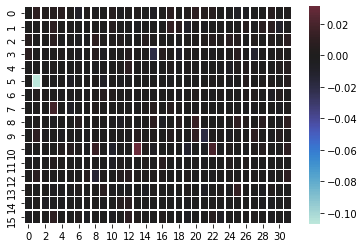

<Figure size 576x432 with 0 Axes>

In [53]:
from activations_tool import activations, model
import activations_tool
from input_generation import rasterize_text
import torch
from PIL import Image

# acts = (activations(model.visual.layer4[0].conv1, rasterize_text("Trump")) - activations(model.visual.layer4[0].conv1, rasterize_text("eeeeee"))).squeeze(# image = Image.open("../../seri/datasets/test_images/trump.png")
image = Image.open("../../seri/datasets/test_images/trump.png")
image = image.convert("RGB")

acts = (activations(model.visual.layer4[0].conv2, rasterize_text("Trump"))).squeeze()
# acts = (activations(model.visual.layer4[0].conv2, rasterize_text("asdfaklsdjfklajsdf"))).squeeze()

print(acts.shape)
print(weightmap[unit].shape)

out = np.zeros((512))

for i in range(512):
    v = torch.nn.functional.conv2d(acts[i].reshape(1, 1, 14, 14), weightmap[unit][i].reshape(1, 1, 2, 2).half().to(device="cuda"), stride=1).cpu()
    out[i] = v.mean()

# print(acts_and_weights.shape)
# print(meaned_weightmap[unit].shape)

# acts_and_weights = np.multiply(meaned_weightmap[unit], acts, stride=1)

# print(acts_and_weights.shape)

ax = sns.heatmap(out.reshape((16,32)), linewidth=0.5, center=0)

print("Max:", (-out).argsort()[:10])

plt.figure(figsize=(8, 6))
plt.show()

# Gradient X Activation

In [43]:
# Gradient X Activation
import captum

submodel = activations_tool.Submodel(model, (4, 0, 5))
ga = captum.attr.LayerGradientXActivation(submodel, submodel.model.layer4[0].conv1)

input_t = activations_tool.transform(image)

for i in range(2048):
    ga.attribute(input_t, )

SyntaxError: invalid syntax (<ipython-input-43-bb3bee238bef>, line 5)

# Investigating the Hat's Text Facets

In [58]:
activations_tool.channel_difference_engine(activations_tool.map_microscope_layer(activations_tool.model, (4, 2, 6)), rasterize_text("H"), rasterize_text("eeeeee"))

# Turns out the hat has text facet H @ 4/2/6/1188, not 4/2/6/2...

HOOKED: output size torch.Size([1, 2048, 7, 7])
HOOKED: output size torch.Size([1, 2048, 7, 7])


{1816: 1.1884765625,
 1188: 1.00189208984375,
 1865: 0.8515625,
 668: 0.632568359375,
 354: 0.6104736328125,
 1933: 0.607421875,
 607: 0.58544921875,
 1570: 0.568359375,
 924: 0.5380859375,
 374: 0.46923828125,
 1420: 0.452880859375,
 350: 0.425201416015625,
 93: 0.419677734375,
 415: 0.41796875,
 1568: 0.416748046875,
 1605: 0.412445068359375,
 678: 0.40625,
 1162: 0.400390625,
 1783: 0.392578125,
 178: 0.384765625,
 1385: 0.384765625,
 824: 0.38397216796875,
 1169: 0.381134033203125,
 560: 0.3759765625,
 1135: 0.37109375,
 677: 0.36328125,
 897: 0.351806640625,
 366: 0.339935302734375,
 1787: 0.3359375,
 966: 0.334228515625,
 1760: 0.32080078125,
 699: 0.313507080078125,
 656: 0.312469482421875,
 144: 0.309814453125,
 523: 0.30712890625,
 1968: 0.304931640625,
 483: 0.299560546875,
 839: 0.29736328125,
 1130: 0.29296875,
 254: 0.29052734375,
 1871: 0.28399658203125,
 1917: 0.2818603515625,
 1206: 0.279052734375,
 1226: 0.26806640625,
 411: 0.2667236328125,
 1501: 0.2640380859375,
 37